In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch

In [5]:
save_dir = "/Users/saad.lahrichi/PhD/Nautilus/spie/develop/results/meep_meep/inverse/"
#train_field_resim_inv = torch.load(os.path.join(save_dir, "inverse-v3/train_field_resim.pt"), weights_only=False)
#train_field_truth_inv = torch.load(os.path.join(save_dir, "inverse-v3/train_field_truth.pt"), weights_only=False)

val_field_resim_inv = torch.load(os.path.join(save_dir, "inverse-v3/valid_field_resim.pt"), weights_only=False)
val_field_truth_inv = torch.load(os.path.join(save_dir, "inverse-v3/valid_field_truth.pt"), weights_only=False)

# Load training and validation data for the tandem model
#train_field_resim_tandem = torch.load(os.path.join(save_dir, "tandem-v3/train_field_resim.pt"), weights_only=False)
#train_field_truth_tandem = torch.load(os.path.join(save_dir, "tandem-v3/train_field_truth.pt"), weights_only=False)

val_field_resim_tandem = torch.load(os.path.join(save_dir, "tandem-v3/valid_field_resim.pt"), weights_only=False)
val_field_truth_tandem = torch.load(os.path.join(save_dir, "tandem-v3/valid_field_truth.pt"), weights_only=False)

#train_field_resim_tandem_bdy = torch.load(os.path.join(save_dir, "tandem_bdy/train_field_resim.pt"), weights_only=False)
#train_field_truth_tandem_bdy = torch.load(os.path.join(save_dir, "tandem_bdy/train_field_truth.pt"), weights_only=False)

val_field_resim_tandem_bdy = torch.load(os.path.join(save_dir, "tandem_bdy/valid_field_resim.pt"), weights_only=False)
val_field_truth_tandem_bdy = torch.load(os.path.join(save_dir, "tandem_bdy/valid_field_truth.pt"), weights_only=False)

conv_save_dir = "/Users/saad.lahrichi/PhD/Nautilus/spie/develop/results/meep_meep/"
val_field_resim_tandem_conv = torch.load(os.path.join(conv_save_dir, "convTandem/valid_field_resim.pt"), weights_only=False)
#val_field_truth_tandem_conv = torch.load(os.path.join(save_dir, "convTandem/valid_field_truth.pt"), weights_only=False)

fwd_save_dir = "/Users/saad.lahrichi/PhD/Nautilus/spie/develop/results/meep_meep/cvnn/model_forward-v2"
val_field_pred_fwd = torch.load(os.path.join(fwd_save_dir, "valid_field_pred.pt"), weights_only=False)
val_field_truth_fwd = torch.load(os.path.join(fwd_save_dir, "valid_field_truth.pt"), weights_only=False)
#train_field_truth_fwd = torch.load(os.path.join(fwd_save_dir, "train_field_truth.pt"), weights_only=False)
#train_field_pred_fwd = torch.load(os.path.join(fwd_save_dir, "train_field_pred.pt"), weights_only=False)


In [10]:
def compute_error(resim, truth, metric="mse"):
    """Computes error between predicted (resim) and ground truth (truth)."""
    if metric == "mse":
        return np.mean((resim - truth) ** 2)   

In [ ]:
datasets = {
    #"train_inverse": (train_field_resim_inv, train_field_truth_inv),
    "val_inverse": (val_field_resim_inv, val_field_truth_inv),
    #"train_tandem": (train_field_resim_tandem, train_field_truth_tandem),
    "val_tandem": (val_field_resim_tandem, val_field_truth_tandem),
    "val_tandem_bdy": (val_field_resim_tandem_bdy, val_field_truth_tandem_bdy),
    "val_tandem_conv": (val_field_resim_tandem_conv, val_field_truth_tandem_bdy),
    #"train_forward": (train_field_pred_fwd, train_field_truth_fwd),
    "val_forward": (val_field_pred_fwd, val_field_truth_fwd),
}

errors_dict = {}
for name, (resim, truth) in datasets.items():
    errors = [compute_error(r, t) for r, t in zip(resim, truth)]
    errors_dict[name] = np.array(errors)
    print(f"{name} - MSE: {errors_dict[name].mean():.6f}")

val_inverse - MSE: 0.055023
val_tandem - MSE: 0.056265
val_tandem_bdy - MSE: 0.041059
val_tandem_conv - MSE: 0.018768
val_forward - MSE: 0.000118


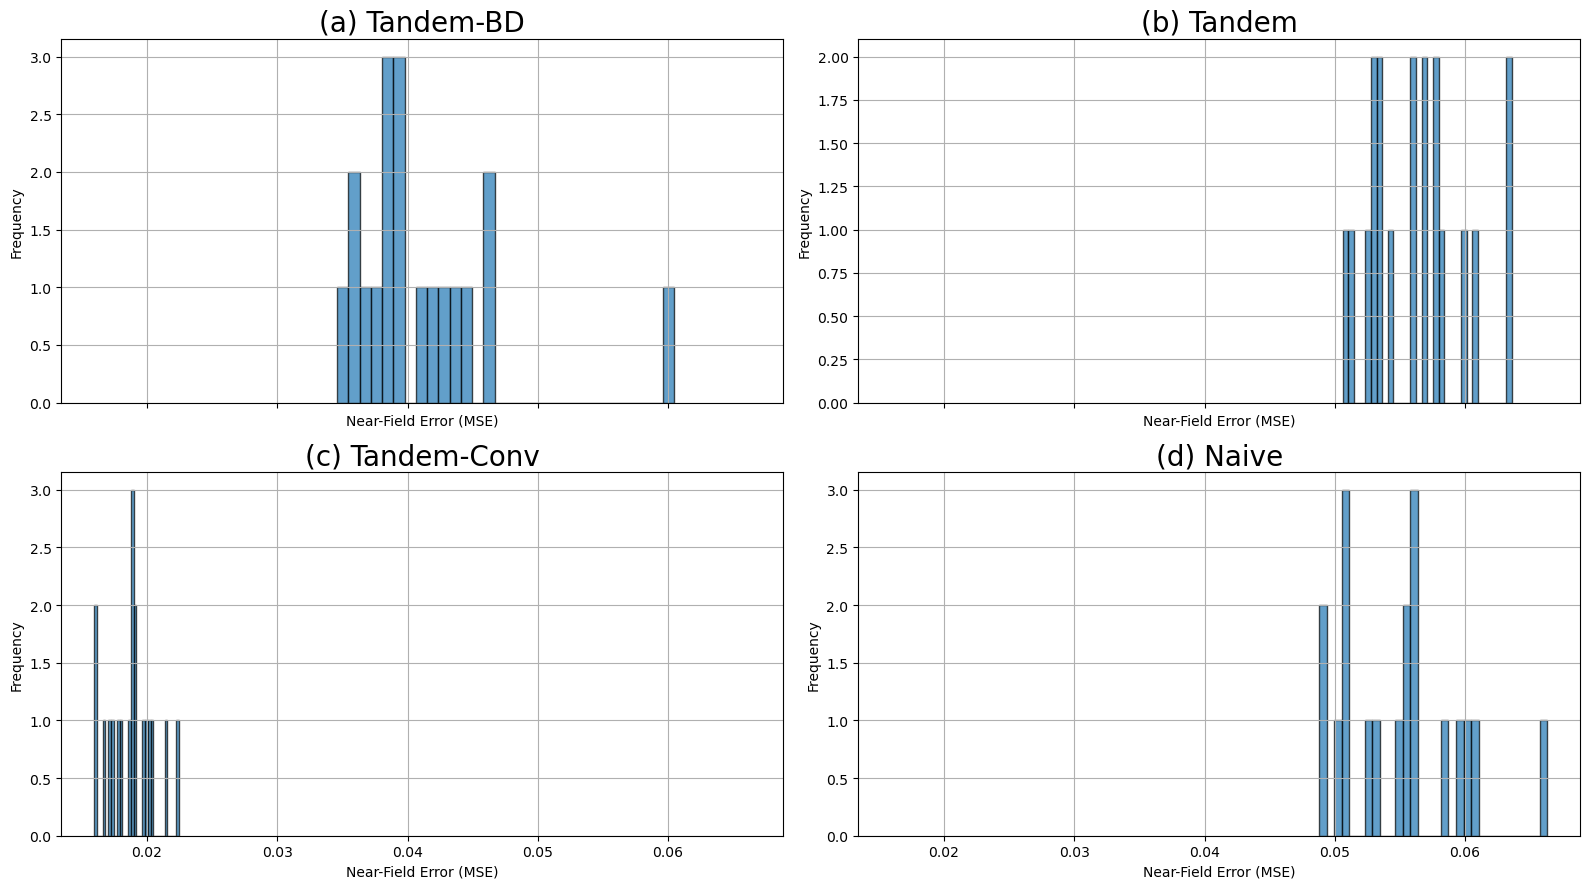

In [20]:
#train_errors_tandem_np = errors_dict["train_tandem"]
val_errors_tandem_np = errors_dict["val_tandem"]
val_errors_tandem_bdy_np = errors_dict["val_tandem_bdy"]
val_errors_tandem_conv_np = errors_dict["val_tandem_conv"]
#train_errors_inv_np = errors_dict["train_inverse"]
val_errors_inv_np = errors_dict["val_inverse"]
#train_errors_fwd_np = errors_dict["train_forward"]
val_errors_fwd_np = errors_dict["val_forward"]

fig, axes = plt.subplots(2, 2, figsize=(16, 9), sharex=True)

# Plot Tandem Model Errors
axes[0, 0].hist(val_errors_tandem_bdy_np, bins=30, alpha=0.7, edgecolor="black")
axes[0, 0].set_xlabel("Near-Field Error (MSE)")
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("(a) Tandem-BD", fontsize=20)
axes[0, 0].grid(True)

axes[0, 1].hist(val_errors_tandem_np, bins=30, alpha=0.7, edgecolor="black")
axes[0, 1].set_xlabel("Near-Field Error (MSE)")
axes[0, 1].set_ylabel("Frequency")
axes[0, 1].set_title("(b) Tandem", fontsize=20)
axes[0, 1].grid(True)

# Plot Inverse Model Errors
axes[1, 1].hist(val_errors_inv_np, bins=30, alpha=0.7, edgecolor="black")
axes[1, 1].set_xlabel("Near-Field Error (MSE)")
axes[1, 1].set_ylabel("Frequency")
axes[1, 1].set_title("(d) Naive", fontsize=20)
axes[1, 1].grid(True)

# Plot Conv Model Errors
axes[1, 0].hist(val_errors_tandem_conv_np, bins=30, alpha=0.7, edgecolor="black")
axes[1, 0].set_xlabel("Near-Field Error (MSE)")
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("(c) Tandem-Conv", fontsize=20)
axes[1, 0].grid(True)

plt.tight_layout()
plt.savefig("updated_hist.png", dpi=300)
plt.show()


In [21]:
# #train_errors_tandem_np = errors_dict["train_tandem"]
# val_errors_tandem_np = errors_dict["val_tandem"]
# val_errors_tandem_bdy_np = errors_dict["val_tandem_bdy"]
# #train_errors_inv_np = errors_dict["train_inverse"]
# val_errors_inv_np = errors_dict["val_inverse"]
# #train_errors_fwd_np = errors_dict["train_forward"]
# val_errors_fwd_np = errors_dict["val_forward"]

# fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# # Plot Tandem Model Errors
# axes[0, 0].hist(train_errors_tandem_np, bins=30, alpha=0.7, edgecolor="black")
# axes[0, 0].set_xlabel("Near-Field Error (MSE)")
# axes[0, 0].set_ylabel("Frequency")
# axes[0, 0].set_title("Tandem Model - Training Near-Field Errors")
# axes[0, 0].grid(True)

# axes[0, 1].hist(val_errors_tandem_np, bins=30, alpha=0.7, edgecolor="black")
# axes[0, 1].set_xlabel("Near-Field Error (MSE)")
# axes[0, 1].set_ylabel("Frequency")
# axes[0, 1].set_title("Tandem Model - Validation Near-Field Errors")
# axes[0, 1].grid(True)

# # Plot Inverse Model Errors
# axes[1, 0].hist(train_errors_inv_np, bins=30, alpha=0.7, edgecolor="black")
# axes[1, 0].set_xlabel("Near-Field Error (MSE)")
# axes[1, 0].set_ylabel("Frequency")
# axes[1, 0].set_title("Inverse Model - Training Near-Field Errors")
# axes[1, 0].grid(True)

# axes[1, 1].hist(val_errors_inv_np, bins=30, alpha=0.7, edgecolor="black")
# axes[1, 1].set_xlabel("Near-Field Error (MSE)")
# axes[1, 1].set_ylabel("Frequency")
# axes[1, 1].set_title("Inverse Model - Validation Near-Field Errors")
# axes[1, 1].grid(True)

# plt.tight_layout()
# plt.save("histogram_tandem")
# plt.show()


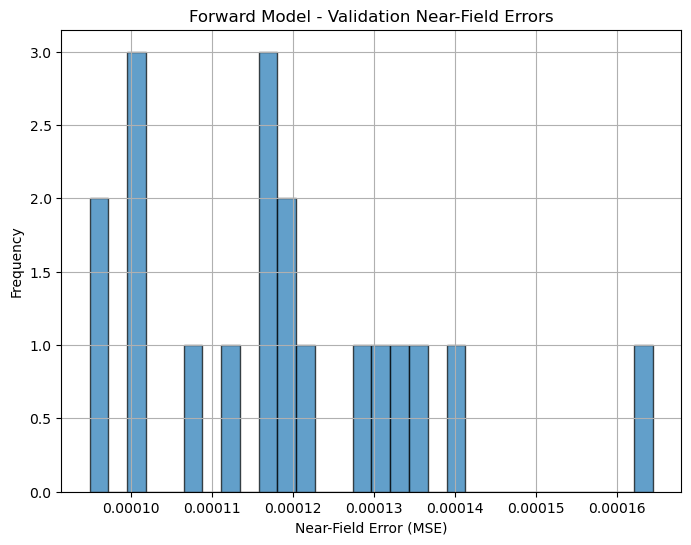

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6), sharex=True)

# Plot Inverse Model Errors
# axes[2, 0].hist(train_errors_fwd_np, bins=30, alpha=0.7, edgecolor="black")
# axes[2, 0].set_xlabel("Near-Field Error (MSE)")
# axes[2, 0].set_ylabel("Frequency")
# axes[2, 0].set_title("Forward Model - Training Near-Field Errors")
# axes[2, 0].grid(True)

plt.hist(val_errors_fwd_np, bins=30, alpha=0.7, edgecolor="black")
plt.xlabel("Near-Field Error (MSE)")
plt.ylabel("Frequency")
plt.title("Forward Model - Validation Near-Field Errors")
plt.grid(True)
plt.savefig("forward_hist.png", dpi=300)

In [21]:
def compute_features(img):
    # img has shape (2, H, W) with channels [real, imaginary]
    real = img[0]
    imag = img[1]
    magnitude = np.sqrt(real**2 + imag**2)
    complex = torch.complex(torch.tensor(real), torch.tensor(imag))
    phase = torch.angle(complex)
    return magnitude, phase


In [22]:
def to_numpy(x):
    return x.detach().cpu().numpy() if hasattr(x, 'detach') else x

gt_all = np.concatenate([to_numpy(x) for x in datasets["val_inverse"][1]], axis=0)         # shape: (N, 2, 166, 166)
forward_all = np.concatenate([to_numpy(x) for x in datasets["val_forward"][0]], axis=0)       # shape: (N, 2, 166, 166)
inverse_all = np.concatenate([to_numpy(x) for x in datasets["val_inverse"][0]], axis=0)       # shape: (N, 2, 166, 166)
tandem_all = np.concatenate([to_numpy(x) for x in datasets["val_tandem_bdy"][0]], axis=0)     # shape: (N, 2, 166, 166)
tandem_conv_all = np.concatenate([to_numpy(x) for x in datasets["val_tandem_conv"][0]], axis=0)     # shape: (N, 2, 166, 166)

# Compute the MSE per sample between the tandem_bdy prediction and ground truth.
# We compute the mean squared error over the channels and spatial dimensions.
mse_values = np.mean((tandem_conv_all - gt_all) ** 2, axis=(1, 2, 3))

# Find the indices of the three samples with the lowest MSE.
best_indices = np.argsort(mse_values)[:3]
print("Selected sample indices (0-indexed):", best_indices)
print("Corresponding MSE values:", mse_values[best_indices])



Selected sample indices (0-indexed): [ 10 230 107]
Corresponding MSE values: [0.0051171  0.00668143 0.00745719]


(2, 166, 166)
0.0
(2, 166, 166)
0.0
(2, 166, 166)
0.0
(2, 166, 166)
0.00015510079
(2, 166, 166)
0.0001721216
(2, 166, 166)
0.00011222786
(2, 166, 166)
0.037555143
(2, 166, 166)
0.02977688
(2, 166, 166)
0.036209468
(2, 166, 166)
0.0051171007
(2, 166, 166)
0.006681429
(2, 166, 166)
0.007457195
(2, 166, 166)
0.076009795
(2, 166, 166)
0.060581196
(2, 166, 166)
0.0531734


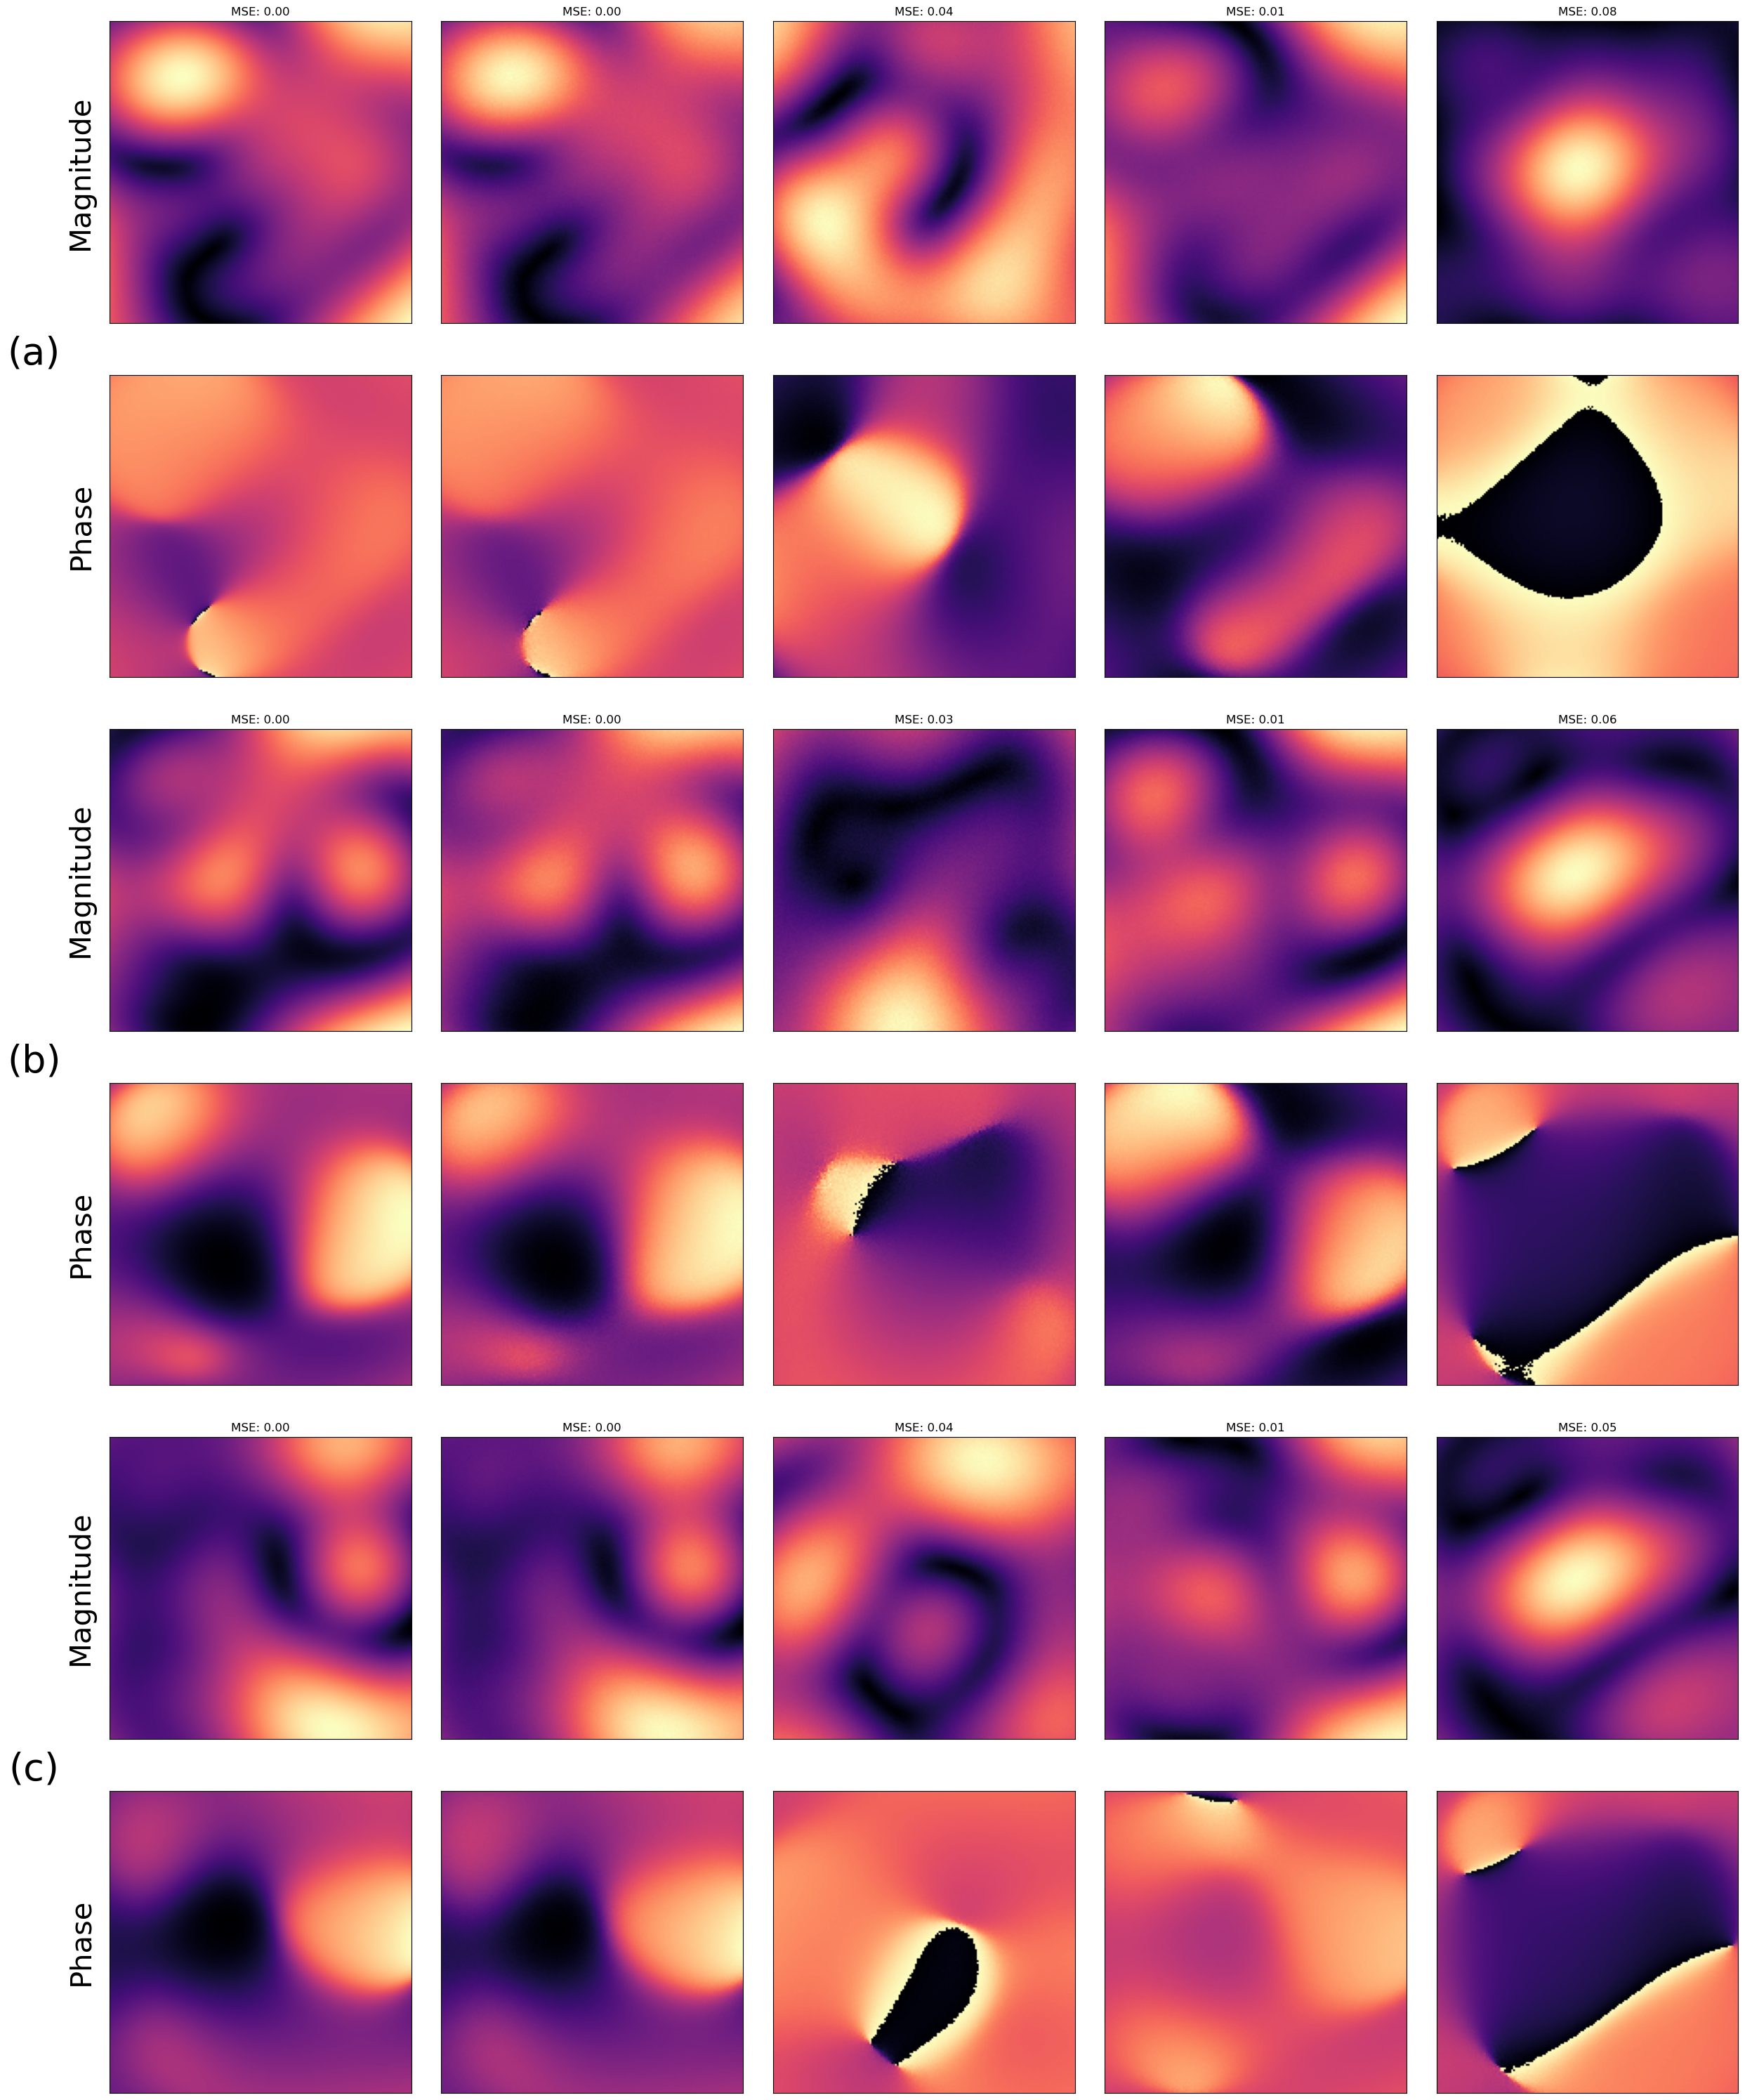

In [58]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(25, 30))

# List of dataset images and their titles for each column.
dataset_list = [
    ("Truth", gt_all),
    ("Forward", forward_all),
    ("Tandem-BD", tandem_all),
    ("Tandem-Conv", tandem_conv_all),
    ("Naive", inverse_all),
]
sample_labels = ['(a)', '(b)', '(c)']


# Loop over each dataset (column) and each sample
for col, (title, data) in enumerate(dataset_list):
    for i, sample_idx in enumerate(best_indices):
        # data[sample_idx] has shape (2, 166, 166)
        sample_img = data[sample_idx]
        magnitude, phase = compute_features(sample_img)
        
        # Determine the row indices: each sample uses two rows
        row_mag = i * 2       # row for magnitude
        row_diff = i * 2 + 1  # row for absolute difference
        
        # Plot magnitude image
        ax = axs[row_mag, col]
        im = ax.imshow(magnitude, cmap='magma')
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')
        if i == 0:
            ax.set_title(title, fontsize=36, pad=20)
        if col == 0:
            ax.set_ylabel("Magnitude", fontsize=30, labelpad=15)
            ax.text(
                -0.25, -0.1, sample_labels[i],
                transform=ax.transAxes,
                fontsize=39,
                va='center', ha='center'
            )
        print((data[sample_idx] - gt_all[sample_idx]).shape)
        mse = np.mean((data[sample_idx] - gt_all[sample_idx]) ** 2, axis=(0, 1, 2))
        print(mse)
        ax.set_title(f"MSE: {mse:.2f}")
        # Plot phase image
        ax = axs[row_diff, col]
        im = ax.imshow(phase, cmap='magma')
        ax.set_xticks([])
        ax.set_yticks([])

        #ax.axis('off')
        if col == 0:
            ax.set_ylabel("Phase", fontsize=30, labelpad=15)
        

plt.tight_layout()
#plt.savefig("mag_phase_updated.png", dpi=300)
plt.show()


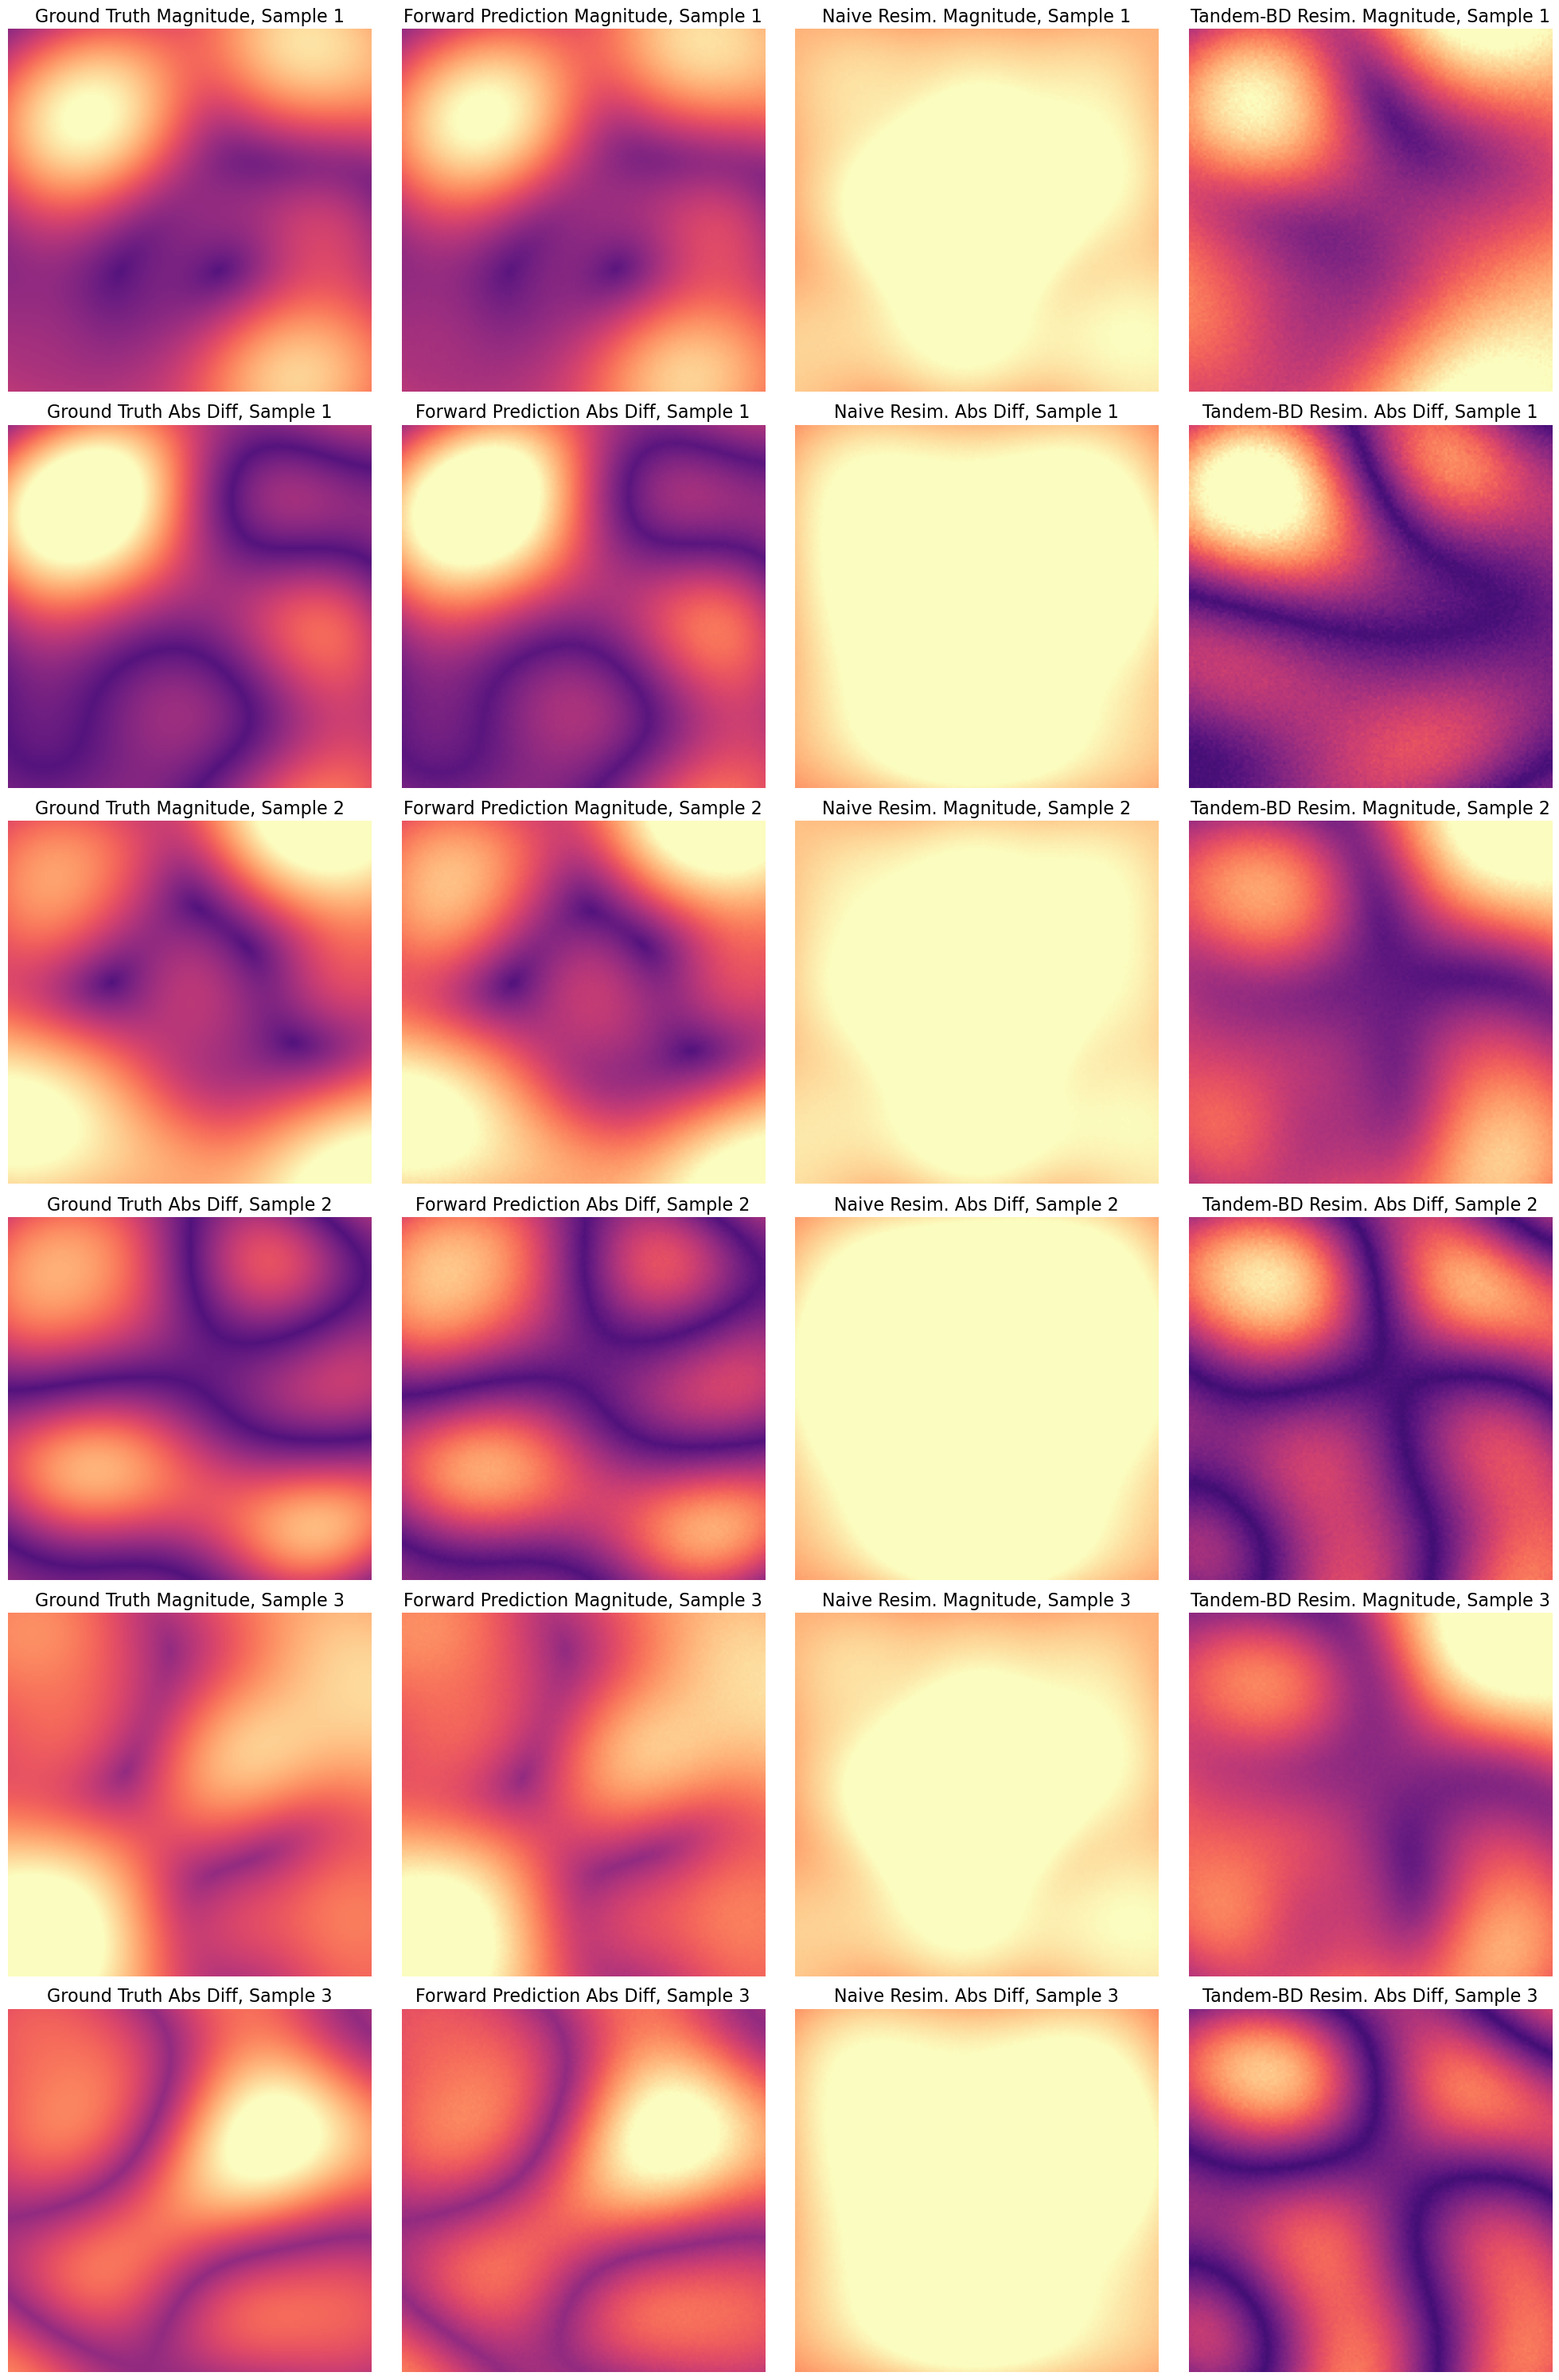

In [ ]:
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 30))

# List of dataset images and their titles for each column.
dataset_list = [
    ("Ground Truth", gt_all),
    ("Forward Prediction", forward_all),
    ("Naive Resim.", inverse_all),
    ("Tandem-BD Resim.", tandem_all)
]

# Loop over each dataset (column) and each sample
for col, (title, data) in enumerate(dataset_list):
    for i, sample_idx in enumerate(best_indices):
        # data[sample_idx] has shape (2, 166, 166)
        sample_img = data[sample_idx]
        instance_vmin = sample_img.min()
        instance_vmax = sample_img.max()
        magnitude, abs_diff = compute_features(sample_img)

        # Determine the row indices: each sample uses two rows
        row_mag = i * 2       # row for magnitude
        row_diff = i * 2 + 1  # row for absolute difference
        
        # Plot magnitude image
        ax = axs[row_mag, col]
        im = ax.imshow(magnitude, cmap='magma', vmin=instance_vmin, vmax=instance_vmax)
        ax.set_title(f"{title} Magnitude, Sample {i+1}", fontsize=16)
        ax.axis('off')
        
        # Plot absolute difference image
        ax = axs[row_diff, col]
        im = ax.imshow(abs_diff, cmap='magma', vmin=instance_vmin, vmax=instance_vmax)
        ax.set_title(f"{title} Abs Diff, Sample {i+1}", fontsize=16)
        ax.axis('off')

plt.tight_layout()
plt.savefig("preds.png", dpi=300)
plt.show()
